In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [65]:
import mglearn

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

sns.set_style()

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
print(iris['DESCR'][:198] + '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predicti
...


In [14]:
print('first five rows \n',iris['data'][:5])

first five rows 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [16]:
iris.target.shape

(150,)

In [17]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=0)
X_train.shape, y_train.shape

((112, 4), (112,))

In [31]:
iris_frame = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
X_train.shape

(112, 4)

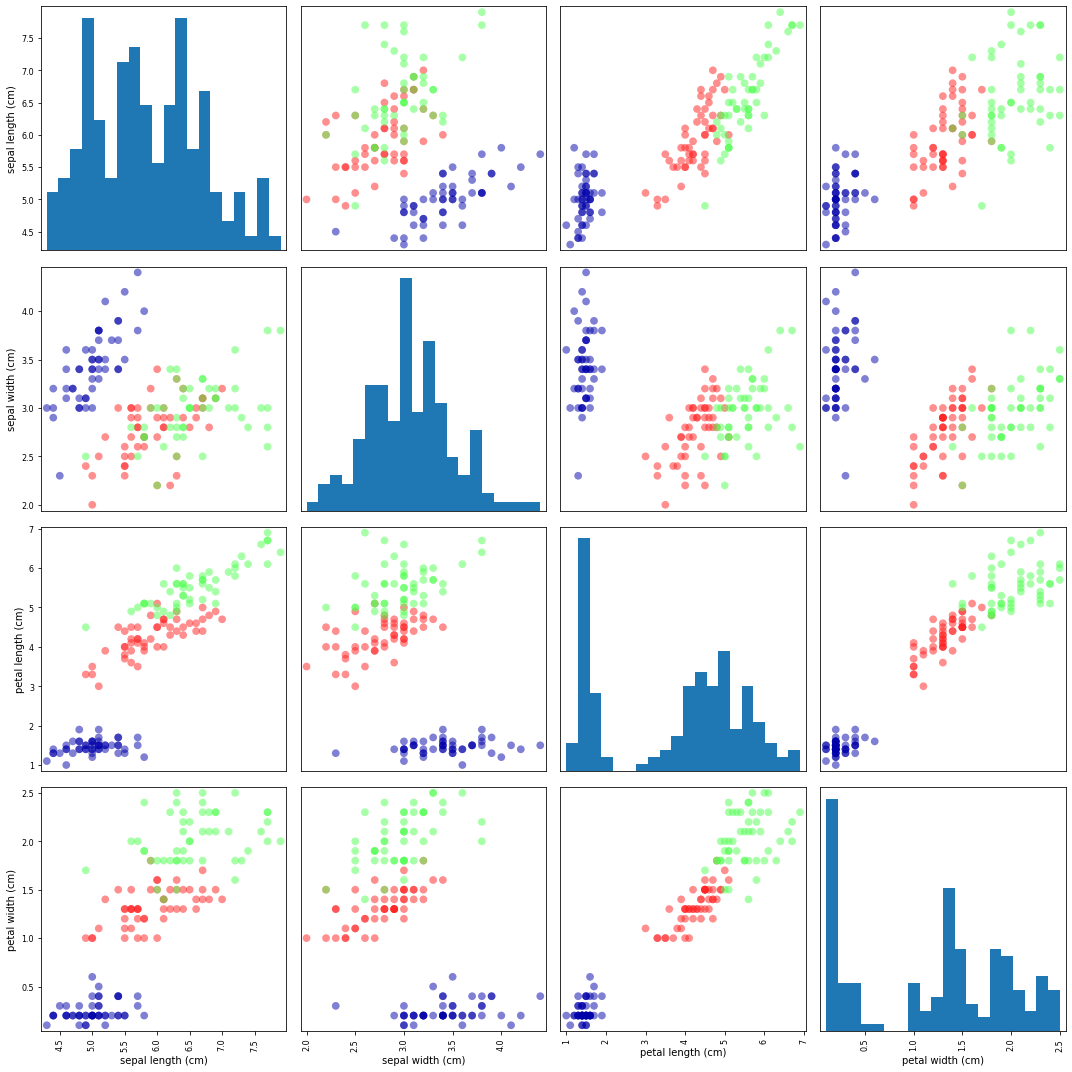

In [68]:
# scatter matrix plot of the dataset
scatter_matrix(iris_frame, figsize=(15, 15), c=iris.target, alpha=.5,
               s=60, marker='o', cmap=mglearn.cm3, hist_kwds={'bins':20})
plt.tight_layout()
plt.show()

In [69]:
#fitting a model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [73]:
#making Predictions
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)

print(f'Prediction : {prediction}')
print(f'Prediction class : {iris.target_names[prediction]}')

Prediction : [0]
Prediction class : ['setosa']


In [86]:
# Evaluating the model
y_pred = knn.predict(X_test)
print(f'Predictions {y_pred}')
print(f'Model accuracy : {round(np.mean(y_pred==y_test), 2)}')

Predictions [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Model accuracy : 0.97


In [88]:
round(knn.score(X_test, y_test), 2)

0.97